### Apresentação ✒️

Notebook destinado ao estudo do DBSCAN, um algoritmo de aprendizagem não supervisionada baseado na densidade dos dados. A sua principal diferença em relação ao K-Means é que não demanda a pré-compreensão dos clusters presentes no dataset os quais são encontrados proceduralmente pelo modelo com base em três elementos importantes :

* pontos nucleares 
* pontos de borda
* ruido 

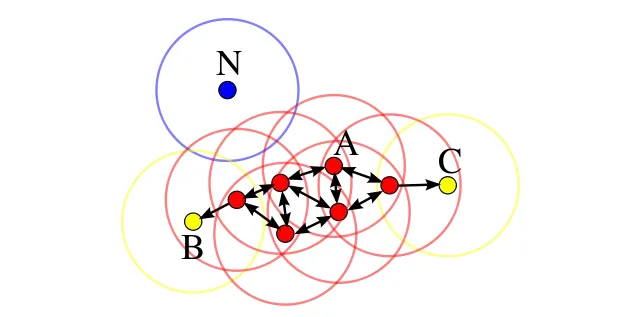

Em vermelho, tem-se os pontos nucleares, os amarelos são os pontos de borda, enquanto que o azul simboliza o ruido. O que é tido como ponto nuclear e de borda forma um cluster. 

#### Library 📚

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

#### Carregando o dataset 💾



In [3]:
iris = load_iris()

y            = iris.target
df_y         = pd.DataFrame(y)
df_y.columns = ["original_label"]

X            = iris.data
df_X         = pd.DataFrame(X)
df_X.columns = ['Sepal length','Sepal width','Petal length','Petal width']

df = pd.concat([df_X, df_y], axis=1)

In [4]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,original_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.shape

(150, 5)

In [7]:
df.original_label.unique()

array([0, 1, 2])

In [8]:
df.isnull().sum()

Sepal length      0
Sepal width       0
Petal length      0
Petal width       0
original_label    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

#### Exploração dos dados 🔎

Criando um dicionário para servir de armazenamento para os parâmetros a serem informados nas funções.

In [23]:
parameters = {
    "dataset": df,
    "style": "whitegrid", 
    "color": "coolwarm", 
    "height": 12, 
    "width": 6,
    "bins": 35
}

dbscan_parameters = {
    "min_eps": 0.1, 
    "max_eps": 1, 
    "min_samples": 2, 
    "max_samples": 15
}

In [13]:
def data_distribuition(
        dataset: DataFrame, 
        style : str, 
        height: int, 
        width: int, 
        bins: int
        ):
    """ 
    Visualizes the distribution of each feature in the dataset using histograms.

    Parameters:
    ----------
    dataset : DataFrame
        The dataset to be visualized, where each column represents a feature.
    
    style : str
        Seaborn theme for plot styling (e.g., 'darkgrid', 'whitegrid').
    
    height : int
        The height of the figure in inches.
    
    width : int
        The width of the figure in inches.
    
    bins : int
        Number of bins for the histograms.
    """
    feature = dataset.columns
    sns.set_theme(style=style)

    # Determinar o número de linhas no grid :
    
    # Fixo para 3 colunas
    n_cols = 3 

    # Calcular o número de linhas necessárias
    n_rows = (len(feature) + n_cols - 1) // n_cols  

    plt.figure(figsize=(height, width))

    for i, feature in enumerate(feature, 1):

        data = dataset[feature]

        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data, kde=True, bins=bins)
        plt.title(f"Histograma de {feature}")
        
    plt.tight_layout()
    plt.show()

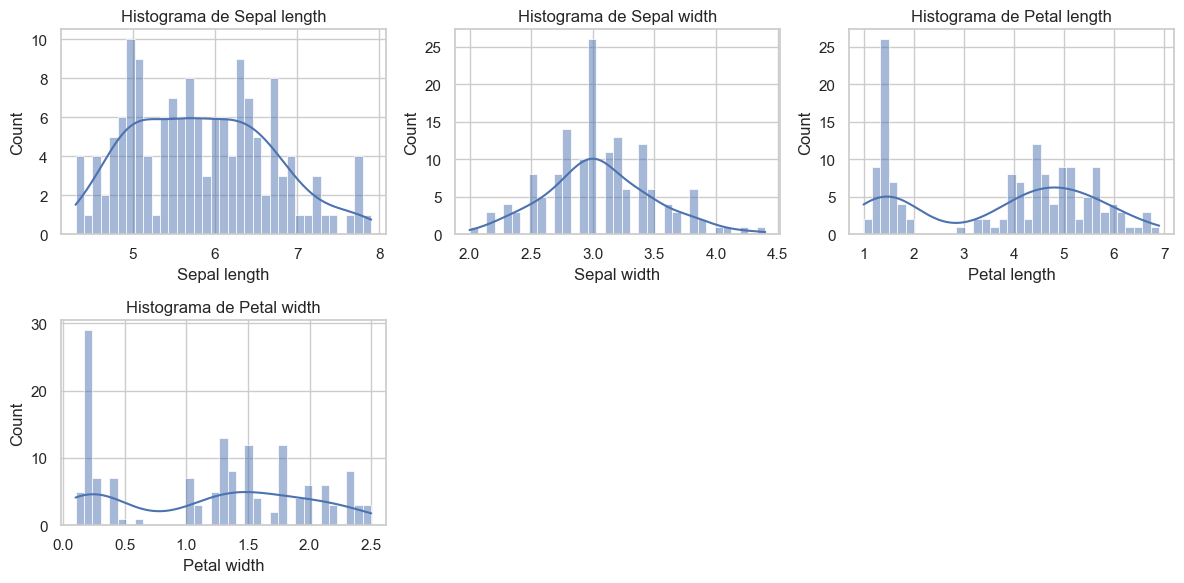

In [14]:
data_distribuition(
    dataset = df.drop(["original_label"], axis=1),
    style   = parameters["style"],
    height  = parameters["height"],
    width   = parameters["width"],
    bins    = parameters["bins"]
)

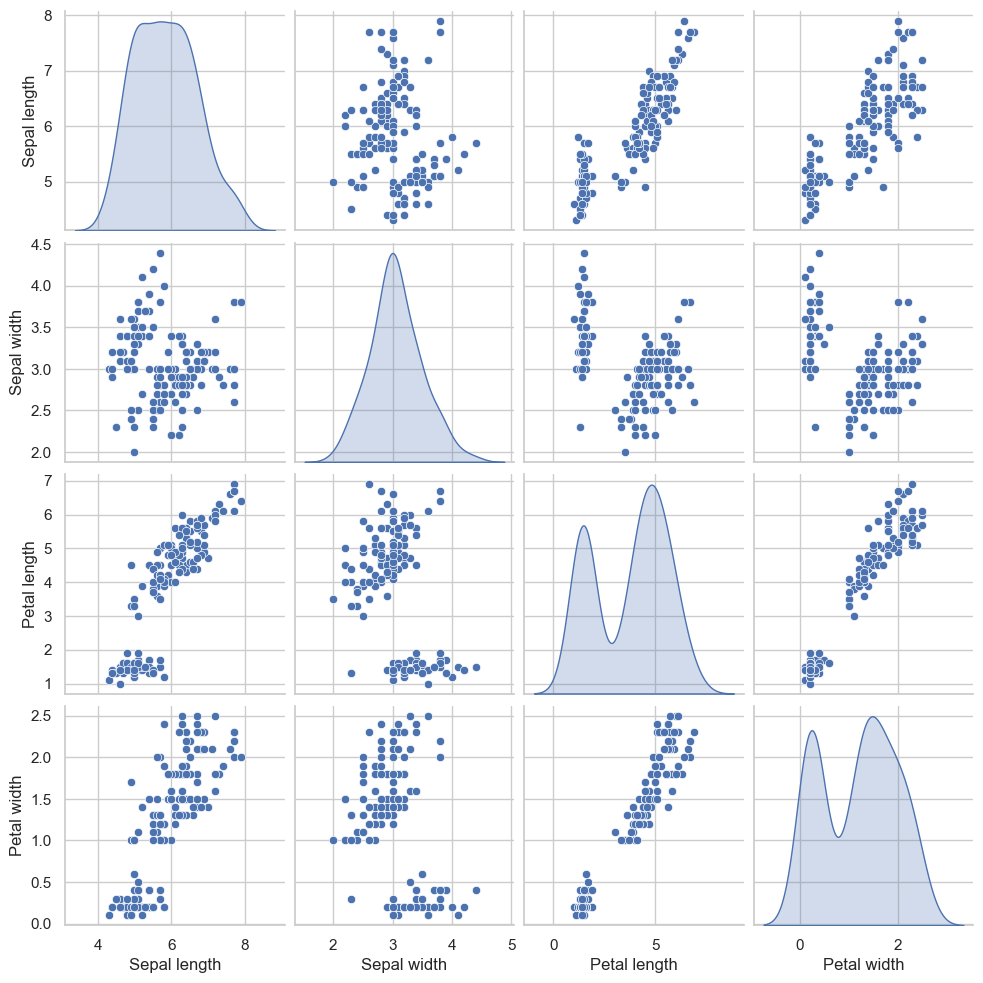

In [16]:
sns.pairplot(df.drop(["original_label"], axis=1), diag_kind="kde")
plt.show()

In [17]:
def boxplot(
        dataset: DataFrame, 
        style : str, 
        height : int, 
        width : int
    ):
    """
    Generates a series of boxplots for each feature in the given dataset.

    This function visualizes the distribution and identifies potential outliers 
    for each feature in the provided dataset using boxplots. It automatically 
    creates subplots for up to six features per figure.

    Parameters:
    ----------
    dataset : DataFrame
        A pandas DataFrame containing the dataset to be visualized. 
        Each column in the dataset represents a feature whose distribution will 
        be displayed as a boxplot.

    style : str
        The style theme for the seaborn visualization. This can be one of 
        seaborn's predefined themes, such as 'darkgrid', 'whitegrid', 'dark', 
        'white', or 'ticks'. It controls the overall appearance of the plots.

    height : int
        The height of the figure in inches. This value determines the vertical 
        size of the overall plot.

    width : int
        The width of the figure in inches. This value determines the horizontal 
        size of the overall plot.

    Returns:
    -------
    None
        This function does not return any value. It directly generates and 
        displays the plots using matplotlib.

    Notes:
    ------
    - The function assumes the dataset has up to six features to visualize. If 
      the dataset contains more than six features, only the first six will be 
      displayed.
    - Subplots are arranged in a 2x3 grid layout. If there are fewer than six 
      features, the remaining subplots will be empty.
    - Ensure that the 'sns' (seaborn) and 'plt' (matplotlib.pyplot) libraries 
      are imported before calling this function.
    - The 'style' parameter should be a valid seaborn theme name; otherwise, 
      the function may raise an error.
    - Currently, the function has a minor issue where the variable 'df' is 
      referenced instead of the passed 'dataset'. This needs to be corrected 
      for the function to work as intended.
    """

    sns.set_theme(style=style)
    
    feature = dataset.columns
    plt.figure(figsize=(height, width))

    for i, feature in enumerate(feature, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data=df[feature])
        plt.title(f"Boxplot de {feature}")
    
    plt.tight_layout()
    plt.show()

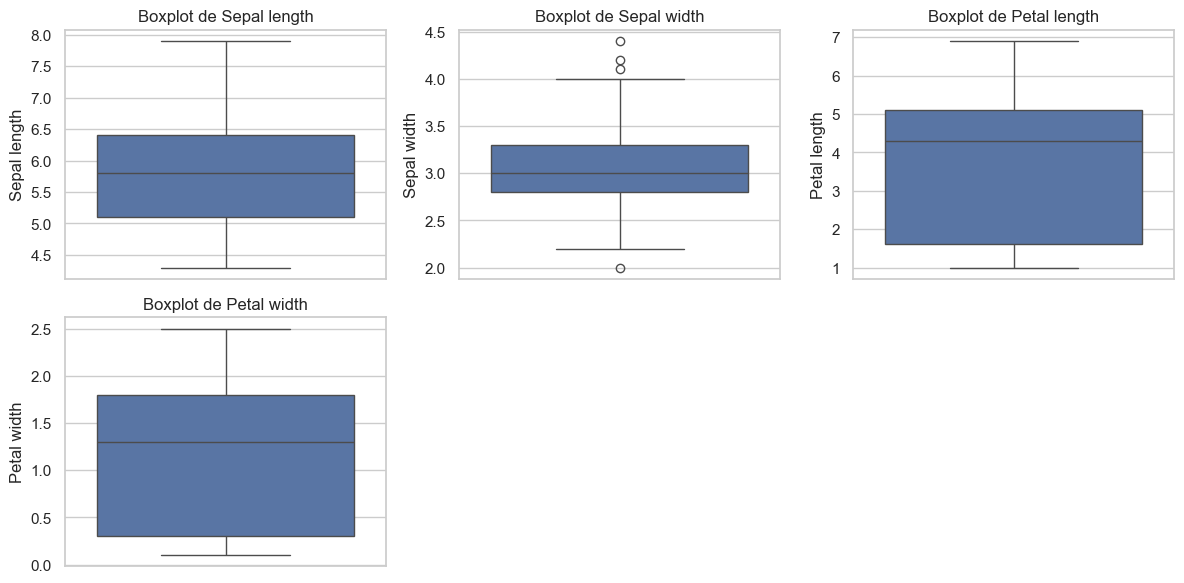

In [19]:
boxplot(dataset = df.drop(["original_label"], axis=1), 
        style   = parameters["style"], 
        height  = parameters["height"], 
        width   = parameters["width"])

In [20]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width,original_label
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Scaler

In [41]:
scaler = StandardScaler()

normalized_values = scaler.fit_transform(df.drop(["original_label"], axis=1))

normalized_values[:1]

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368]])

#### DBSCAN

Criando uma função que irá buscar - iterativamente - os melhores hiperparâmetros para o DBSCAN, visando a melhor qualidade de formação dos clusters. 

In [52]:
def search_hyperparams(
        min_eps: float, 
        max_eps: float, 
        min_sample: int, 
        max_sample: int, 
        dataset: DataFrame
):
    """
    Searches for the best hyperparameters for the DBSCAN clustering algorithm 
    using a manual grid search and silhouette score.

    Parameters:
    ----------
    min_eps : float
        Minimum value for the `eps` parameter in DBSCAN.
    
    max_eps : float
        Maximum value for the `eps` parameter in DBSCAN.
    
    min_sample : int
        Minimum value for the `min_samples` parameter in DBSCAN.
    
    max_sample : int
        Maximum value for the `min_samples` parameter in DBSCAN.
    
    dataset : DataFrame
        The dataset on which DBSCAN clustering will be applied. 
        It should be preprocessed and scaled as required.

    Returns:
    -------
    None
        Prints the best hyperparameters (`eps`, `min_samples`) and their corresponding 
        silhouette score based on the given search space.

    Notes:
    ------
    - The silhouette score is used to evaluate clustering quality, with higher 
      values indicating better-defined clusters.
    - If no valid clustering configuration is found (e.g., all samples belong to 
      a single cluster), those cases are ignored. 
    """
    # Values to be test.
    eps_value = np.arange(min_eps, max_eps, 0.1)
    min_samples_value = range(min_sample, max_sample)

    # Variables to storage the best parameters
    best_eps = None
    best_min_sample = None
    best_score = -1

    # Manual GridSearch
    for eps in eps_value:
        for min_sample in min_samples_value:
            
            # Apply DBSCAN.
            dbscan = DBSCAN(
                eps         = eps, 
                min_samples = min_sample)
            
            labels = dbscan.fit_predict(dataset)

            # To ignore scenarios without more than one cluster
            if len(set(labels)) <= 1: 
                continue
            
            # Calculating the silhoutte score
            score = silhouette_score(dataset, labels)

            # Updating the best parameters
            if score > best_score:
                best_eps = eps
                best_min_sample = min_sample
                best_score = score

    print(f"Melhores hiperparâmetros:\n")
    print(f"Melhor eps: {best_eps.round(3)}")
    print(f"Melhor min_sample: {best_min_sample}")
    print(f"Silhoutte score: {best_score.round(3)}")


In [74]:
search_hyperparams(
    min_eps    = dbscan_parameters["min_eps"], 
    max_eps    = dbscan_parameters["max_eps"], 
    min_sample = dbscan_parameters["min_samples"], 
    max_sample = dbscan_parameters["max_samples"], 
    dataset    = df.drop(["original_label"], axis=1)
)

Melhores hiperparâmetros:

Melhor eps: 0.9
Melhor min_sample: 2
Silhoutte score: 0.686


In [101]:
model = DBSCAN(
    eps         = 0.9, 
    min_samples = 2
)

model_for_normalized_values = DBSCAN(
    eps         = 0.7, 
    min_samples = 5
)

labels = model.fit_predict(df.drop(["original_label"], axis=1))
labels_with_normalized_values = model_for_normalized_values.fit_predict(normalized_values)

#### Visualizando os clusters

In [102]:
def visualize_cluster(X: float, y: int, size : int):
    """
    Function that build a cluster graph for cluster's visualization 
    """
    # Noting the labels for each points
    unique_labels = set(y)

    # Building the graph with the labels. 
    for label in unique_labels:
        plt.scatter(X[y==label][:, 0], X[y==label][:, 1], s = size, label = f"Cluster {label}")

    plt.legend(loc="upper right")

    plt.show()

In [103]:
X_array = np.array(df.drop(["original_label"], axis=1))
y_array = np.array(labels)

X_array_normalized = np.array(normalized_values)
y_array_normalized = np.array(labels_with_normalized_values)


Cluster sem normalizaçao 

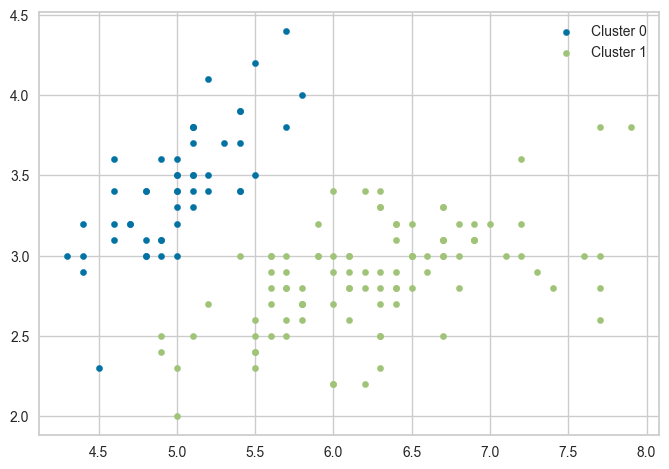

In [104]:
visualize_cluster(
    X    = X_array, 
    y    = y_array, 
    size = 20
)

In [105]:
# Verify the quality of clusters builded with silhoutte score. 

silhoutte = silhouette_score(
    df.drop(["original_label"], axis=1), 
    model.labels_, 
    metric="euclidean"
)

print(f"A silhueta do modelo é de aproximadamente: {silhoutte.round(3)}.")

A silhueta do modelo é de aproximadamente: 0.686.


In [106]:
# Verify the quality of clusters builded with Davis Bouldin.

davis_bouldin = davies_bouldin_score(
    df.drop(["original_label"], axis=1), 
    model.labels_
) 

print(f"Índice Davis Bouldin do modelo : {davis_bouldin.round(3)}")

Índice Davis Bouldin do modelo : 0.384


Cluster com normalização

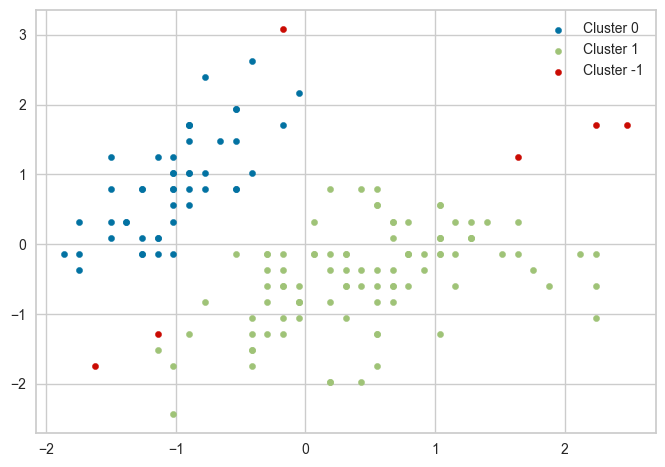

In [107]:
visualize_cluster(
    X    = X_array_normalized, 
    y    = y_array_normalized, 
    size = 20
)

In [108]:
# Verify the quality of clusters builded with silhoutte score. 

silhoutte = silhouette_score(
    normalized_values, 
    model_for_normalized_values.labels_, 
    metric="euclidean"
)

print(f"A silhueta do modelo é de aproximadamente: {silhoutte.round(3)}.")

A silhueta do modelo é de aproximadamente: 0.522.


In [109]:
# Verify the quality of clusters builded with Davis Bouldin.

davis_bouldin = davies_bouldin_score(
    normalized_values, 
    model.labels_
) 

print(f"Índice Davis Bouldin do modelo : {davis_bouldin.round(3)}")

Índice Davis Bouldin do modelo : 0.595
